# Perceptron Multi-Couches (MLP)

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/perceptron.ipynb)

Le perceptron multi-couches, également connu sous le nom de MLP (Multi-Layer Perceptron), est un type de réseau de neurones artificiels utilisé dans l'apprentissage automatique et la classification de données. Il est composé de plusieurs couches de neurones interconnectés, dont au moins une couche cachée, en plus des couches d'entrée et de sortie.

Les couches d'entrée reçoivent les données en entrée, tandis que les couches cachées effectuent des transformations non linéaires sur ces données à l'aide de fonctions d'activation, telles que la fonction sigmoïde ou la fonction ReLU. Ces transformations permettent au MLP d'apprendre des représentations complexes des données, ce qui le rend adapté à la résolution de problèmes non linéaires.

Les poids et les biais des connexions entre les neurones sont ajustés à l'aide d'algorithmes d'apprentissage, tels que la rétropropagation du gradient, pour minimiser l'erreur de prédiction. Cette technique permet au MLP d'apprendre à partir de données d'entraînement et de généraliser ses connaissances pour effectuer des prédictions sur de nouvelles données.

En résumé, le MLP est un modèle d'apprentissage profond qui peut apprendre des représentations complexes des données, ce qui en fait un outil puissant pour des tâches telles que la classification, la régression et la reconnaissance de motifs dans un large éventail de domaines.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/Multilayer_perceptron)

In [13]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

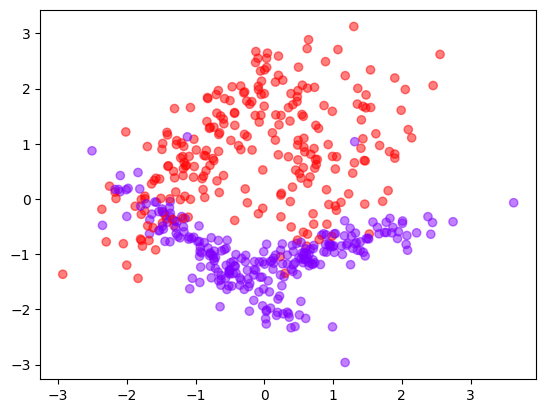

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap='rainbow')

## Perceptron Multi-Couches avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Précision de l'Entraînement:", accuracy_score(y_train, clf.predict(X_train)))
print("Précision du Test:", accuracy_score(y_test, y_pred))

Précision de l'Entraînement: 0.9025
Précision du Test: 0.86


/Users/jlchereau/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


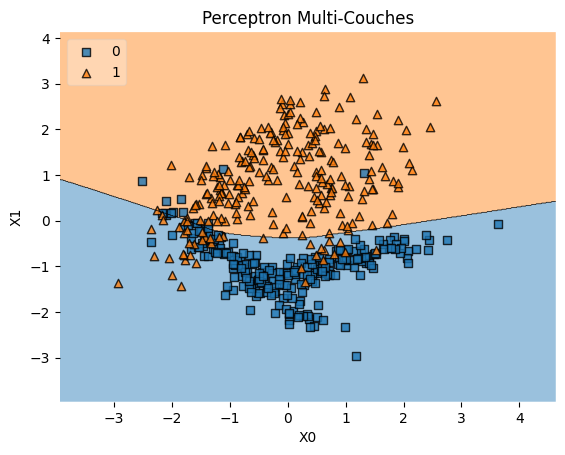

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Perceptron Multi-Couches')
plt.show()